In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import string

In [3]:
positive = list(pd.read_csv("/Users/yizhijuan/Documents/001UW/510 Digital/Lab1/positive_words.txt", header=0).iloc[:,0].values)
negative = list(pd.read_csv("/Users/yizhijuan/Documents/001UW/510 Digital/Lab1/negative_words.txt", header=0).iloc[:,0].values)

In [28]:

def count(response, words_list):
    count = 0
    for str1 in response.split(' '):
        str1 = str1.translate(str.maketrans('', '', string.punctuation))
        str1 = str1.lower()
        #print(str1)
        for str2 in words_list:
            if str1 == str2:
                count = count + 1
    return count
def posi_or_neg(response):
    count_positive = count(response, positive)
    count_negative = count(response, negative)
    if count_positive > count_negative:
        print(random.choice(posi_res))
        mood = 1
    elif count_positive < count_negative:
        print(random.choice(neg_res))
        mood = -1
    else:
        print(random.choice(neu_res))
        mood = 0
    return mood

In [36]:
record = pd.DataFrame()
posi_res = ["Great!", "Cool!","Nice!"]
neg_res = ["Too bad!", "Womp, womp!"]
neu_res = ["Well", "I see.", "Sounds great."]
question = ["How are you today?", "Do you have any plans for today?", "With whom?", "Where to?"]

In [43]:
username = input("Hi! What is your name? ")
user_response = []
moods = []
quit = "QT"
print(f'Nice to meet you, {username}! You can type {quit} to quit.')
i = 0
print(question[i])
response = input()
mood = posi_or_neg(response)
while response != quit and i < 3:
    i = i+1
    print(question[i])
    response = input()
    posi_or_neg(response)
    new_response = {'user_name': username, 'question': question[i], 'response': response, 'moods': mood}
    user_response.append(new_response)
    
new_data = pd.DataFrame(user_response)
record = pd.concat([record, new_data])
print("Thanks for your response. Have a good day!")

Hi! What is your name? Cindy
Nice to meet you, Cindy! You can type QT to quit.
How are you today?
Feel good.
Nice!
Do you have any plans for today?
Do my homework.
Sounds great.
With whom?
By myself.
Well
Where to?
At GIX.
Sounds great.
Thanks for your response. Have a good day!


In [44]:
record

,user_name,question,response,moods
0,A,Do you have any plans for today?,yeah. eating,1
1,A,With whom?,my friends,1
2,A,Where to?,at home,1
0,Bob,Do you have any plans for today?,relax,-1
1,Bob,With whom?,myself,-1
2,Bob,Where to?,at home,-1
0,Cindy,Do you have any plans for today?,Do my homework.,1
1,Cindy,With whom?,By myself.,1
2,Cindy,Where to?,At GIX.,1


<AxesSubplot:ylabel='moods'>

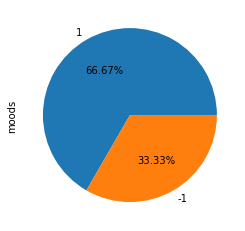

In [48]:
record['moods'].value_counts().plot(kind='pie', autopct='%.2f%%')